In [2]:
import os
import tensorflow as tf
import tensorflow_io as tfio
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [3]:
import librosa

In [21]:

in_dir = '../DoReMir/initslurtest_vn/frames/'


In [33]:
switch = False
for file in os.listdir(in_dir):
    if not file.endswith(".pickle"):
        continue
    
    fname = os.path.join(in_dir, file)
    
    with open(fname, 'rb') as handle:
        new_spect = np.array(pickle.load(handle))
        print(new_spect.shape)
    if switch:
        spects = np.concatenate((spects, new_spect), axis=0)
    else:
        spects = new_spect
        switch = True
    

(2478, 80, 15, 3)
(2823, 80, 15, 3)
(1804, 80, 15, 3)
(1801, 80, 15, 3)
(5059, 80, 15, 3)
(1694, 80, 15, 3)
(836, 80, 15, 3)
(1394, 80, 15, 3)
(1798, 80, 15, 3)
(816, 80, 15, 3)
(2785, 80, 15, 3)
(2472, 80, 15, 3)
(1459, 80, 15, 3)
(2079, 80, 15, 3)
(1446, 80, 15, 3)
(785, 80, 15, 3)
(1587, 80, 15, 3)
(2003, 80, 15, 3)
(797, 80, 15, 3)


Shape:  (35916, 80, 15, 3)


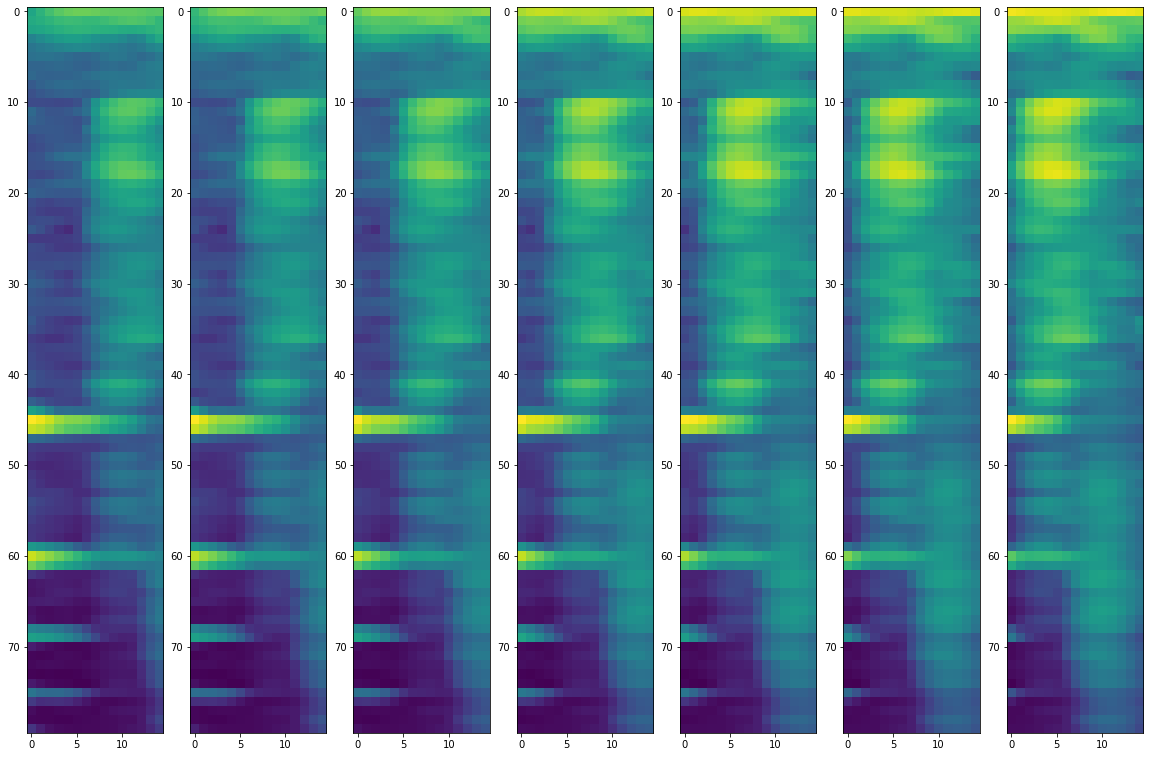

In [36]:
print("Shape: ",spects.shape)
fig, axs = plt.subplots(1,7,figsize=(20,20))
for i in range(7):
    axs[i].imshow(spects[2400+i,:,:,2])

In [8]:
import librosa
from librosa.feature import melspectrogram

In [10]:
MELS = 80
WIN = 1024
NFFT = 1024
HOP = 440
FMIN = 27.5
FMAX = 16000.0
SR = 44100

TOP_DB = 80

FNAME = '../DoReMir/initslurtest_vn/initslurtest_vn_wav/slurtest01.wav'

<AudioIOTensor: shape=[748032      1], dtype=<dtype: 'int16'>, rate=44100>


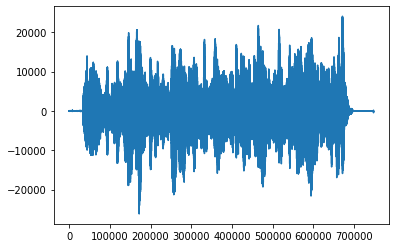

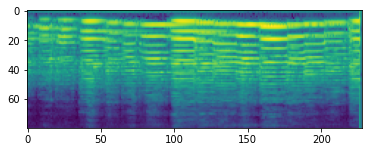

In [31]:
audio = tfio.audio.AudioIOTensor(FNAME)
print(audio)
audio_tensor = tf.squeeze(audio[:], axis=[-1])
plt.plot(audio_tensor)
audio_tensor = tf.cast(audio_tensor, tf.float32)/np.max(audio_tensor)
audio_tensor = audio_tensor[100000:200000]

plt.show()

spectrogram = tfio.audio.spectrogram(audio_tensor, nfft=NFFT, window=WIN, stride=HOP)
mel_spectrogram = tfio.audio.melscale(spectrogram, rate=SR, mels=MELS, fmin=FMIN, fmax=FMAX)
dbscale_mel_spectrogram = tfio.audio.dbscale(mel_spectrogram, top_db=TOP_DB)
plt.imshow(np.transpose(dbscale_mel_spectrogram))

748032


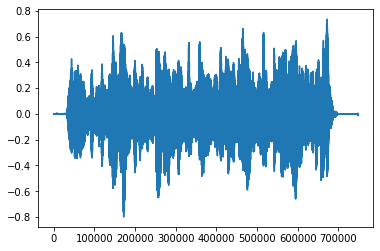

In [29]:
signal, sample_rate = librosa.load(FNAME, sr=SR, mono=True)
print(len(signal))
plt.plot(signal)
signal = signal/np.max(signal)
signal = signal[100000:200000]

spectrogram_2 = melspectrogram(y=signal,
    sr=SR,
    hop_length=HOP,
    win_length=WIN,
    n_fft=WIN,
    n_mels=MELS,
    fmin=FMIN,
    fmax=FMAX
)
log_spectrogram = np.log(spectrogram_2 + np.finfo(float).eps)

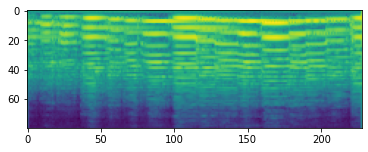

In [57]:
spect = np.log(spectrogram_2 + np.finfo(float).eps)
plt.imshow(spect)

In [59]:
stds = np.std(spect, 1)
means = np.mean(spect, 1)
print(stds.shape)



(80,)
